 1.Data Cleaning

In [8]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [10]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1709,ham,U meet other fren dun wan meet me ah... Muz b ...,NaN,NaN,NaN
4471,spam,3. You have received your mobile content. Enjoy,NaN,NaN,NaN
3737,ham,We stopped to get ice cream and will go back a...,NaN,NaN,NaN
2595,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,NaN,NaN,NaN
921,ham,On ma way to school. Can you pls send me ashle...,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [13]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
722,ham,That is wondar full flim.
2701,ham,"Hiya, sorry didn't hav signal. I haven't seen ..."
2426,spam,Valentines Day Special! Win over å£1000 in our...
4862,spam,Bored housewives! Chat n date now! 0871750.77....
2998,ham,"Oh, then your phone phoned me but it disconnected"


In [15]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1705,ham,Yun ah.now Ì_ wkg where?btw if Ì_ go nus sc. Ì...
2647,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!"
3992,ham,Nimbomsons. Yep phone knows that one. Obviousl...
4771,ham,"Hi, Mobile no. &lt;#&gt; has added you in th..."
4455,ham,If you want to mapquest it or something look u...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
df['target'] = encoder.fit_transform(df['target'])

In [18]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(403)

In [21]:
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.shape

(5169, 2)

In [24]:
# EDA

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

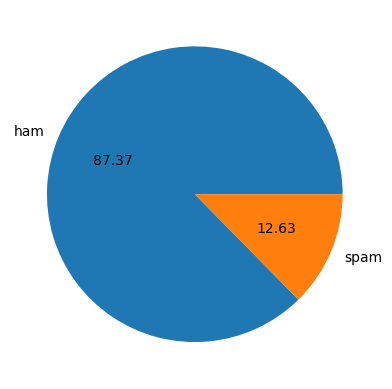

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
# Data is imbalanced

In [29]:
import sys
print (sys.executable)

C:\ProgramData\anaconda3\python.exe


In [30]:
!"C:\ProgramData\anaconda3\python.exe" -m pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import nltk
print(nltk.__version__)

3.9.1


In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df.loc[:,'num_characters'] = df['text'].apply(len)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17540\1112579889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'num_characters'] = df['text'].apply(len)


In [34]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
import nltk
print(nltk.data.path)


['C:\\Users\\Admin/nltk_data', 'C:\\ProgramData\\anaconda3\\nltk_data', 'C:\\ProgramData\\anaconda3\\share\\nltk_data', 'C:\\ProgramData\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [36]:
nltk.download('punkt', download_dir=r'C:\Users\Admin\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Admin\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
nltk.data.path.append(r'C:\Users\Admin\nltk_data')


In [38]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17540\514307095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))


,target,text,num_characters,tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [39]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
import nltk

nltk.download('punkt')        # word/sentence tokenizer
nltk.download('punkt_tab')    # extra sentence boundary data (new in recent NLTK)
nltk.download('stopwords')    # stopwords
nltk.download('wordnet')      # lemmatizer
nltk.download('omw-1.4')      # lemmatizer helper


[nltk_data] Downloading package punkt to C:\Users\Admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
from nltk.tokenize import word_tokenize

text = "Hello there! How are you doing today?"
print(word_tokenize(text))


['Hello', 'there', '!', 'How', 'are', 'you', 'doing', 'today', '?']


In [42]:
df.loc[:, 'tokens'] = df['text'].apply(lambda x: word_tokenize(x))


In [43]:
df.head()

,target,text,num_characters,tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [44]:
df.loc[:,'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


C:\Users\Admin\AppData\Local\Temp\ipykernel_17540\3348213358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [45]:
df.head()

,target,text,num_characters,tokens,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1


In [46]:
df[['num_characters','tokens','num_sentences']].describe()

,num_characters,num_sentences
count,5169.000000,5169.000000
mean,78.977945,1.965564
std,58.236293,1.448541
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,38.000000


In [47]:

print(df.columns)


Index(['target', 'text', 'num_characters', 'tokens', 'num_sentences'], dtype='object')


In [48]:
df[df['target'] == 0][['num_characters','tokens','num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.820195
std,56.358207,1.383657
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,38.000000


In [49]:
df[df['target'] == 1][['num_characters','tokens','num_sentences']].describe()

,num_characters,num_sentences
count,653.000000,653.000000
mean,137.891271,2.970904
std,30.137753,1.488425
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,9.000000


In [50]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

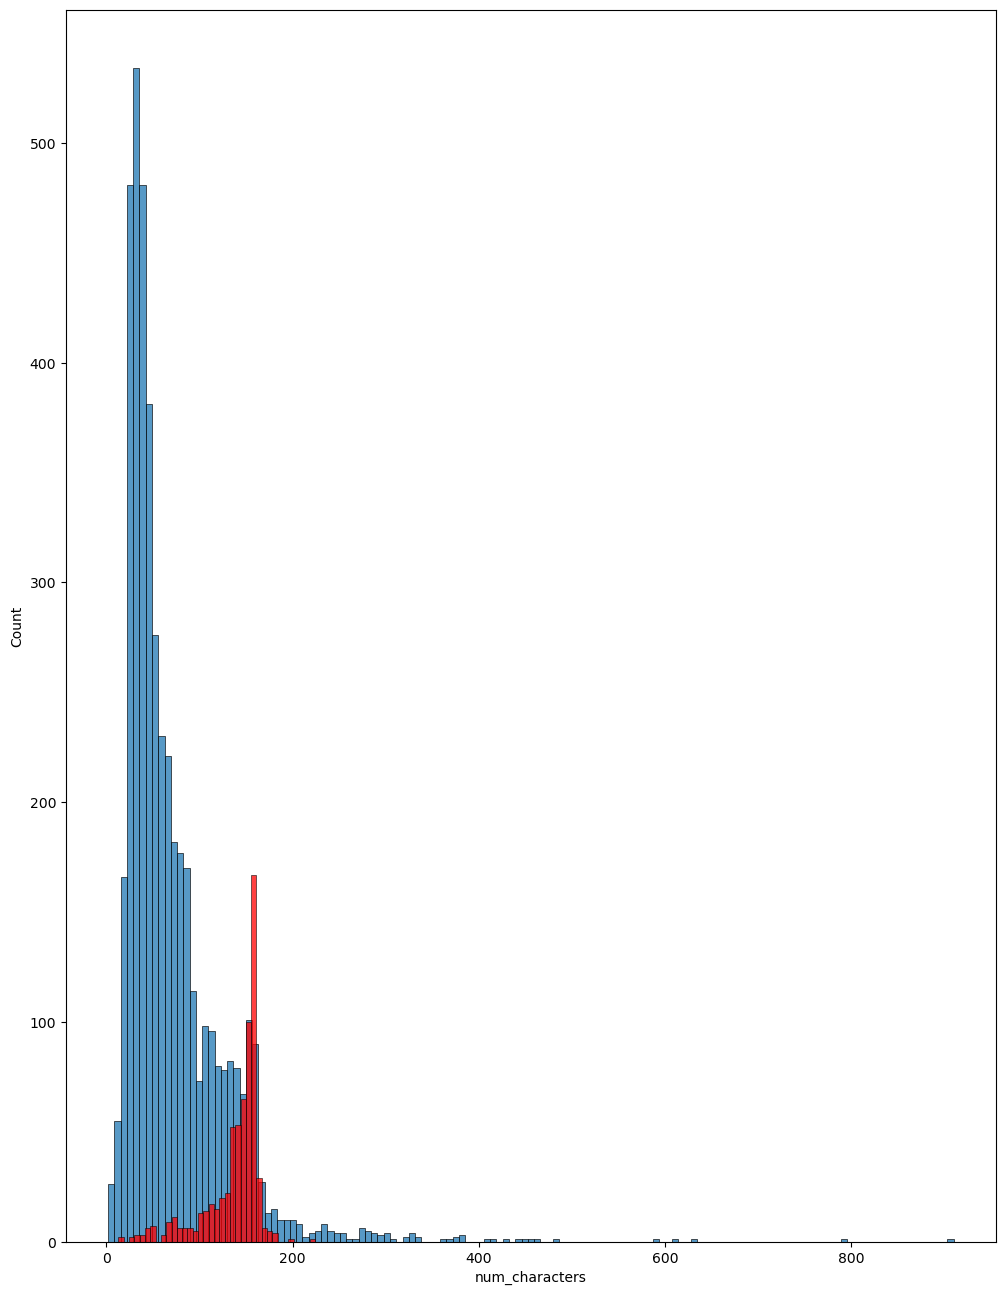

In [51]:
plt.figure(figsize=(12,16))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')

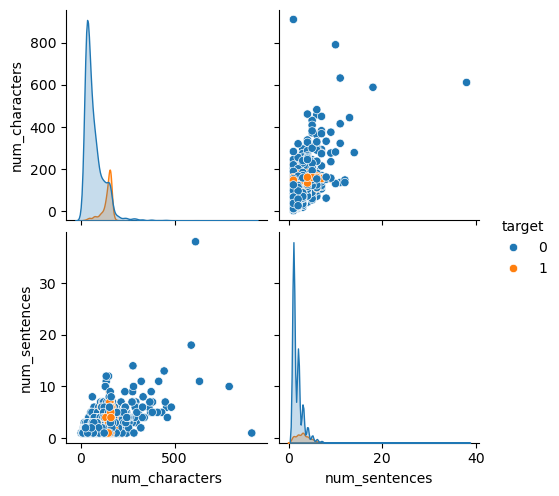

In [52]:
sns.pairplot(df,hue='target')

In [53]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [ ]:
import nltk
from nltk.corpus import stopwords
import string


In [ ]:
nltk.download('stopwords')


In [58]:
def transform_text(text):
    text = text.lower()                # Convert to lowercase
    text = text.split()                # Split into words
    y = []

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return " ".join(y)


In [59]:
transform_text("Some text here")


'text'

In [60]:
def transform_text(text):
    import string
    from nltk.corpus import stopwords

    stop_words = set(stopwords.words('english'))
    text = text.lower()
    
    # Remove punctuation and stopwords
    cleaned_words = [word.strip(string.punctuation) for word in text.split() if word.strip(string.punctuation) not in stop_words]
    
    return " ".join(cleaned_words)


In [61]:
sample_text = "Some text here"
print(transform_text(sample_text))


text


In [62]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gonna home soon want talk stuff anymore tonight k cried enough today'

In [63]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [64]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [65]:
df = df.copy()
df['transformed_text'] = df['text'].apply(transform_text)


In [66]:
df.head()

,target,text,num_characters,tokens,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1,nah think goes usf lives around though


In [67]:
import sys
!{sys.executable} -m pip install --user wordcloud



In [68]:
import sys
sys.path.append(r"C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages")

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Test
print("WordCloud imported successfully 🚀")


WordCloud imported successfully 🚀


In [69]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [70]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

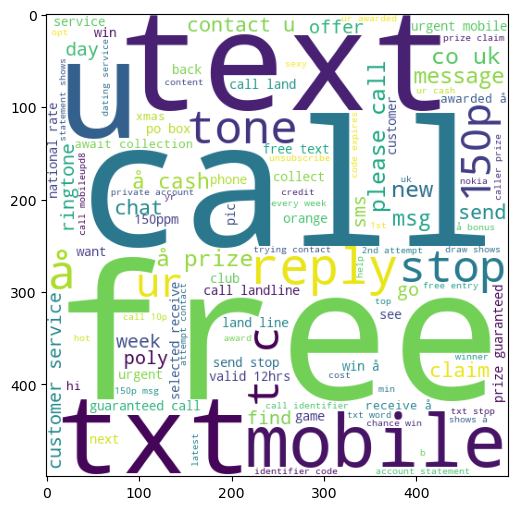

In [71]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [72]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

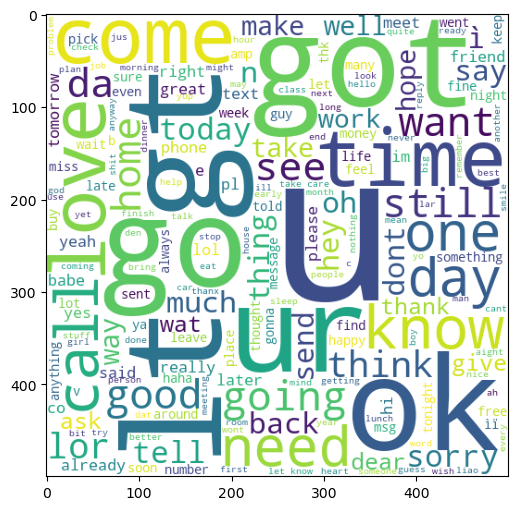

In [73]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [74]:
df.head()

,target,text,num_characters,tokens,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1,nah think goes usf lives around though


In [75]:
spam_corpus =[]
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [76]:
len(spam_corpus)

10776

In [77]:
from collections import Counter


C:\Users\Admin\AppData\Local\Temp\ipykernel_17540\1004217753.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_top, palette='viridis')  # You can try 'magma', 'cool', 'Set2', etc.


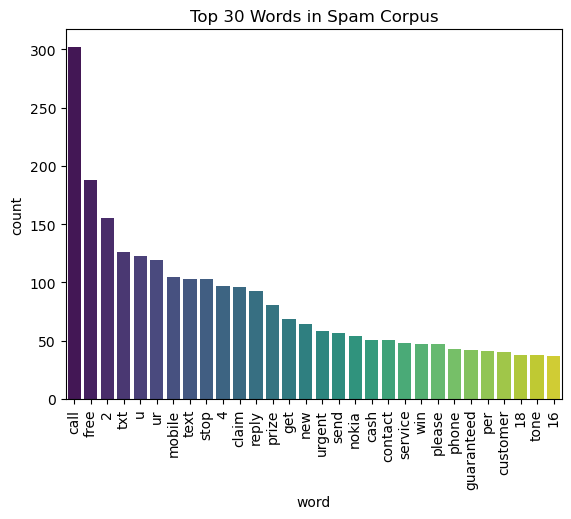

In [78]:
import matplotlib.pyplot as plt

# Get top 30 words
top_words = Counter(spam_corpus).most_common(30)

# Create DataFrame with proper column names
df_top = pd.DataFrame(top_words, columns=['word', 'count'])

# Colorful bar plot
sns.barplot(x='word', y='count', data=df_top, palette='viridis')  # You can try 'magma', 'cool', 'Set2', etc.
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Corpus")
plt.show()

In [79]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [80]:
len(ham_corpus)

35922

C:\Users\Admin\AppData\Local\Temp\ipykernel_17540\373472619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_top, palette='viridis')


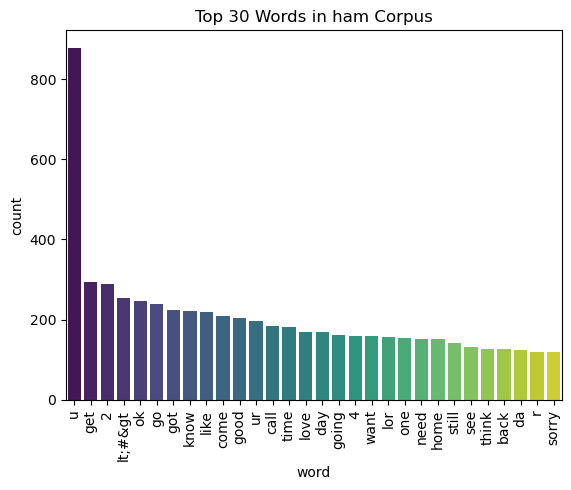

In [81]:
# Get top 30 words
top_words = Counter(ham_corpus).most_common(30)

# Create DataFrame with proper column names
df_top = pd.DataFrame(top_words, columns=['word', 'count'])

# Colorful bar plot
sns.barplot(x='word', y='count', data=df_top, palette='viridis') 
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in ham Corpus")
plt.show()

In [82]:
## Model Building


In [83]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [84]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [85]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
X.shape

(5169, 3000)

In [87]:
y = df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8974854932301741
[[809  87]
 [ 19 119]]
0.5776699029126213


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[896   0]
 [ 23 115]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[896   0]
 [ 23 115]]
1.0


In [96]:
import sys
!{sys.executable} -m pip install xgboost --user



In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [98]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [99]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [101]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [102]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  1.0
For  DT
Accuracy -  0.9429400386847195
Precision -  0.883495145631068
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9587628865979382
For  RF
Accuracy -  0.9758220502901354
Precision -  0.991304347826087
For  AdaBoost
Accuracy -  0.9303675048355899
Precision -  0.9024390243902439
For  BgC
Accuracy -  0.960348162475822
Precision -  0.875968992248062
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9393939393939394
For  xgb
Accuracy -  0.97678916827853
Precision -  0.9830508474576272


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [104]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.977756,1.000000
5,RF,0.975822,0.991304
10,xgb,0.976789,0.983051
8,ETC,0.980658,0.975806
0,SVC,0.976789,0.975000
4,LR,0.952611,0.958763
9,GBDT,0.950677,0.939394
6,AdaBoost,0.930368,0.902439
3,DT,0.942940,0.883495


In [105]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [106]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.977756
2,RF,Accuracy,0.975822
3,xgb,Accuracy,0.976789
4,ETC,Accuracy,0.980658
5,SVC,Accuracy,0.976789
6,LR,Accuracy,0.952611
7,GBDT,Accuracy,0.950677
8,AdaBoost,Accuracy,0.930368
9,DT,Accuracy,0.942940


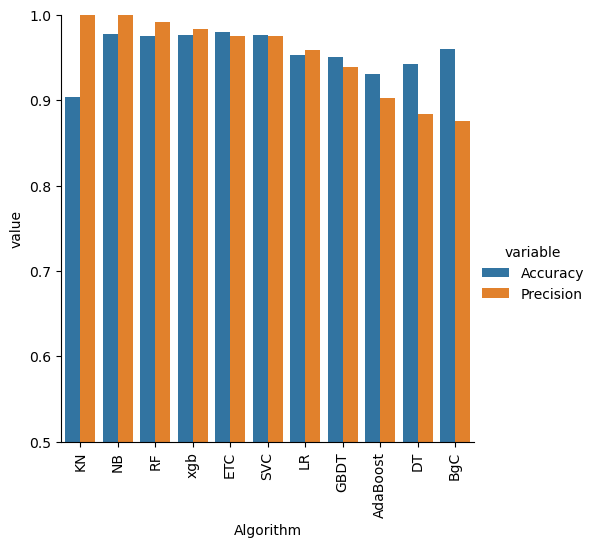

In [107]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [108]:

# model improve
# 1. Change the max_features parameter of TfIdf


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:

new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:

voting.fit(X_train,y_train)


In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))